<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/Tommy-Ngx/ColabRerun/blob/main/Segmentation/MarkRCNN%20Balloon.ipynb#scrollTo=t8Pc0l9NwAZI">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/Tommy-Ngx/ColabRerun/blob/main/Segmentation/">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

# Cài đặt môi trường

In [1]:
import os
if os.path.exists('/content/tommy/')== False:  
  os.mkdir('/content/tommy/')

%cd /content
!git clone "https://github.com/ahmedfgad/Mask-RCNN-TF2.git"

/content
Cloning into 'Mask-RCNN-TF2'...
remote: Enumerating objects: 1434, done.
remote: Total 1434 (delta 0), reused 0 (delta 0), pack-reused 1434
Receiving objects: 100% (1434/1434), 144.54 MiB | 37.24 MiB/s, done.
Resolving deltas: 100% (802/802), done.


In [ ]:
%cd /content/Mask-RCNN-TF2
!pip install -r requirements.txt

In [ ]:
!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.1/mask_rcnn_balloon.h5
!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip
!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

In [ ]:
%cd /content/Mask-RCNN-TF2
!unzip /content/Mask-RCNN-TF2/balloon_dataset.zip

In [8]:
import os, os.path

# simple version for working with CWD
print (len([name for name in os.listdir('.') if os.path.isfile(name)]))

# path joining version for other paths
DIR = '/content/Mask-RCNN-TF2/balloon/train'
print( len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

14
62


In [9]:
os.mkdir("/content/Mask-RCNN-TF2/samples/balloon/dataset/")
!cp -r /content/Mask-RCNN-TF2/balloon/train /content/Mask-RCNN-TF2/samples/balloon/dataset/
!cp -r /content/Mask-RCNN-TF2/balloon/val /content/Mask-RCNN-TF2/samples/balloon/dataset/

In [ ]:
#!python3 balloon.py splash --weights=mask_rcnn_balloon.h5 --image='/content/drive/MyDrive/20220322-Training-maskrcnn/Mask_RCNN/datasets/balloon/val/14898532020_ba6199dd22_k.jpg'

In [8]:
!mkdir datasets

#Training

In [ ]:
%cd /content/Mask-RCNN-TF2/samples/balloon
!python balloon.py train --dataset=/content/Mask-RCNN-TF2/samples/balloon/dataset --weights=coco

In [ ]:
#save the entire model
model.keras_model.save('/content/Mask-RCNN-TF2/samples/balloon/modelX1.h5')
print("Saved model in disk")

#Test splash

In [12]:
#test splash
%cd /content/Mask-RCNN-TF2/samples/balloon
!python balloon.py splash --weights='/content/Mask-RCNN-TF2/mask_rcnn_balloon.h5' --image='/content/Mask-RCNN-TF2/balloon/val/14898532020_ba6199dd22_k.jpg'

/content/Mask-RCNN-TF2/samples/balloon
Using TensorFlow backend.
Weights:  /content/Mask-RCNN-TF2/mask_rcnn_balloon.h5
Dataset:  None
Logs:  /content/Mask-RCNN-TF2/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'r

#Test

In [13]:
%cd /content/Mask-RCNN-TF2
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw

# Root directory of the project
ROOT_DIR = os.path.abspath("/content/Mask-RCNN-TF2/")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import model as modellib, utils

# Path to trained weights file
COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Directory to save logs and model checkpoints, if not provided
# through the command line argument --logs
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

############################################################
#  Configurations
############################################################


class BalloonConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "balloon"

    # We use a GPU with 12GB memory, which can fit two images.
    # Adjust down if you use a smaller GPU.
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + balloon

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

/content/Mask-RCNN-TF2


Using TensorFlow backend.


In [14]:
config = BalloonConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [17]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=DEFAULT_LOGS_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights('/content/Mask-RCNN-TF2/mask_rcnn_balloon.h5', by_name=True)
class_names = ['BG','Balloon']

Processing 1 images
image                    shape: (1024, 686, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  138.20000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


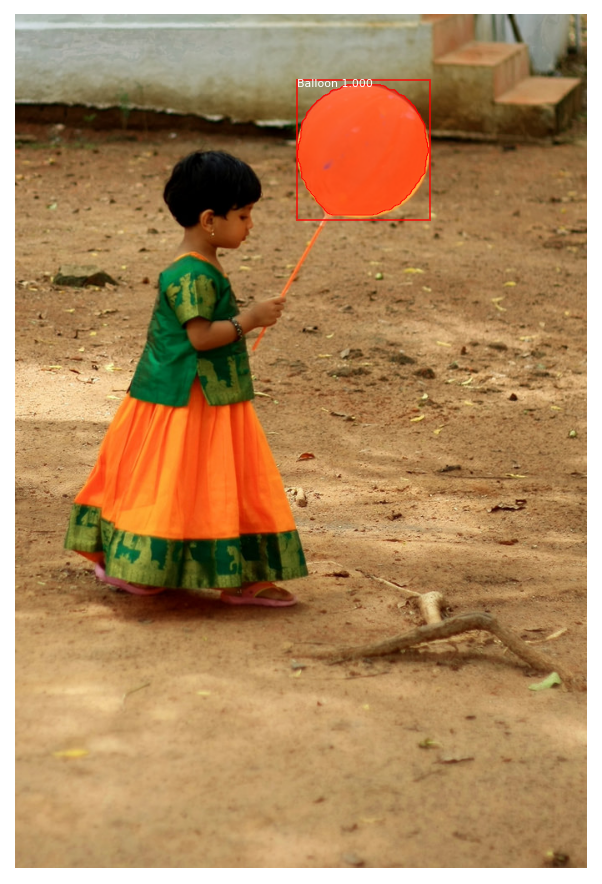

In [18]:
from mrcnn import visualize
# Load a random image from the images folder
image = skimage.io.imread('/content/Mask-RCNN-TF2/balloon/val/3800636873_ace2c2795f_b.jpg')
len([image])
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])